In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.sparse.linalg as la
import matplotlib.animation as animation

In [2]:
#3 Implementation
#constants
Nx=100
Ny=100
Du=0.05
Dv=1.0
k=5
a=0.1305
b=0.7695
LeftX=0.0
RightX=4.0
LeftY=0.0
RightY=4.0
#inhomogeneous perturbation
r=0.01*(a+b)*np.random.rand((Nx+1)*(Ny+1),1)
u0=a+b+r
u0 = u0.flatten()
v0=np.full(u0.shape, b / (a+b)**2)
T=20.0
dx = (RightX-LeftX)/Nx # grid step in x-direction
dy =(RightY-LeftY)/Ny # grid step in y-direction
# function for 2D Laplacian matrix generator
def FDLaplacian2D(LeftX, RightX, LeftY, RightY, Nx, Ny):
        dx = (RightX-LeftX)/Nx # grid step in x-direction
        dy =(RightY-LeftY)/Ny # grid step in y-direction
        Dx=sp.diags([1/dx, -1/dx],[0,-1], shape= (Nx+2,Nx+1))
        Dy=sp.diags([1/dy, -1/dy],[0,-1], shape= (Ny+2,Ny+1))
        Dx = sp.csr_matrix(Dx)
        Dx[0,0]=0
        Dx[Nx+1,Nx]=0
        Dy = sp.csr_matrix(Dy)
        Dy[0,0]=0
        Dy[Ny+1,Ny]=0
        DxT=Dx.transpose()
        DyT=Dy.transpose()
        Lxx=DxT.dot(Dx)
        Lyy=DyT.dot(Dy)
        Ix=sp.eye(Nx+1,Nx+1,0)
        Iy=sp.eye(Ny+1,Ny+1,0)
        A=sp.kron(Iy,Lxx)+sp.kron(Lyy,Ix)
        return A
#initialize system matrix
A=FDLaplacian2D(LeftX,RightX, LeftY, RightY,Nx,Ny)
# A=sp.csr_matrix(A)
print(np.shape(u0))
#from assignment 4
# def solveFE(uStart,vStart,tStart,tEnd,Nt):
#     h=(tEnd-tStart)/Nt
#     u = uStart
#     v=vStart
#     Bu=(sp.eye((Nx+1)*(Ny+1))-h*Du*A)
#     Bv=(sp.eye((Nx+1)*(Ny+1))-h*Dv*A)
#     Cu=h*k*(a-uStart+uStart*uStart*vStart)
#     Cv=h*k*(b-uStart*uStart*vStart)
#     for i in range(1,Nt):
#         u=Bu*u +Cu#u+h*(-A@uStart+f) #@ (sp.eye(..)-h*A)@uStart +h*f
#         v=Bv*v +Cv
#     return u,v
def solveFE(uStart, vStart, tStart,tEnd, Nt):
    hk=(tEnd-tStart)*k/Nt
    I=sp.eye((Nx+1)*(Ny+1))
    B=I-h*Du*A
    C=I-h*Dv*A
#     B=sp.csr_matrix(B)
#     C=sp.csr_matrix(C)
#     uStart=sp.csr_matrix(uStart)
#     vStart=sp.csr_matrix(vStart)
    amat=np.full(np.shape(uStart),a)
    bmat=np.full(np.shape(uStart),b)
#     amat=sp.csr_matrix(a)
#     bmat=sp.csr_matrix(b)
    for i in range (Nt):
        uEnd= B*uStart + hk * (amat+ uStart * uStart * vStart)
        vEnd=C*vStart + hk * (bmat -uStart * uStart * vStart)
#         uEnd=uStart+h*(-Du*A.dot(uStart)+k*(a-uStart+uStart*uStart*vStart))
#         vEnd=vStart+h*(-Dv*A.dot(vStart)+k*(b-uStart*uStart*vStart))
        uStart=uEnd
        vStart=vEnd
    return uEnd,vEnd


(10201,)


In [3]:
#4.(a)
#empirical choice for stable Nt
tStart=0
tEnd=20
val,vec=la.eigs(A)
maxev=np.max(val)
h=(2/(maxev)+k)
Nt=(tEnd-tStart)/h
print ("The stable time step is ", h)
print ("The stable number of time steps is ", Nt)

The stable time step is  (5.0004000967669455+0j)
The stable number of time steps is  (3.999679948196782+0j)


In [4]:
#4. (b)
import time
start_time=time.time()
uEnd, vEnd=solveFE(u0, v0, tStart,tEnd, 4)
uEnd=uEnd.astype('float64')
vEnd=vEnd.astype('float64')
end_time=time.time()
print("Total CPU time is ", end_time-start_time)

Total CPU time is  0.005983829498291016


<ipython-input-4-dcb04eb8b141>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  uEnd=uEnd.astype('float64')
<ipython-input-4-dcb04eb8b141>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  vEnd=vEnd.astype('float64')


Text(0.5, 1.0, 'Visualization of the activator at T=0')

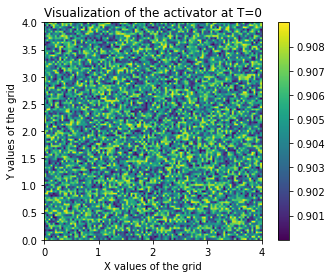

In [5]:
#4. (c)
plt.ion()
plt.figure(1)
plt.clf()
plt.imshow(np.reshape(u0,(Nx+1,Ny+1)),extent=[LeftX,RightX, LeftY,RightY]) # use the f array here
plt.colorbar()
plt.xlabel('X values of the grid')
plt.ylabel('Y values of the grid')
plt.title('Visualization of the activator at T=0')

[2.01374603e+41 8.87247683e+41 1.93831300e+40 ... 3.05371978e+40
 2.58217427e+43 5.87221485e+40]


Text(0.5, 1.0, 'Visualization of the activator at T=20')

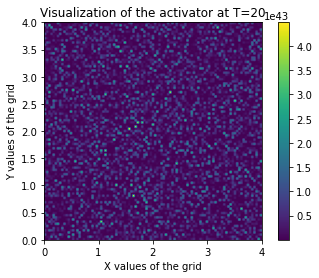

In [6]:
plt.ion()
plt.figure(2)
plt.clf()
print(uEnd)
plt.imshow(np.reshape(uEnd,(Nx+1,Ny+1)),extent=[LeftX,RightX, LeftY,RightY]) # use the f array here
plt.colorbar()
plt.xlabel('X values of the grid')
plt.ylabel('Y values of the grid')
plt.title('Visualization of the activator at T=20')

Text(0.5, 1.0, 'Visualization of the inhibitor at T=0')

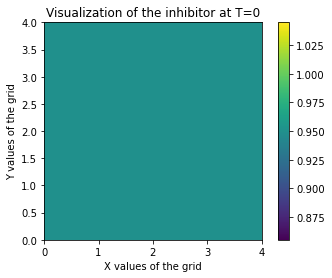

In [7]:
plt.ion()
plt.figure(1)
plt.clf()
plt.imshow(np.reshape(v0,(Nx+1,Ny+1)),extent=[LeftX,RightX, LeftY,RightY]) # use the f array here
plt.colorbar()
plt.xlabel('X values of the grid')
plt.ylabel('Y values of the grid')
plt.title('Visualization of the inhibitor at T=0')

Text(0.5, 1.0, 'Visualization of the inhibitor at T=20')

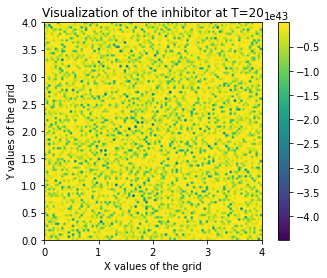

In [8]:
plt.ion()
plt.figure(1)
plt.clf()
plt.imshow(np.reshape(vEnd,(Nx+1,Ny+1)),extent=[LeftX,RightX, LeftY,RightY]) # use the f array here
plt.colorbar()
plt.xlabel('X values of the grid')
plt.ylabel('Y values of the grid')
plt.title('Visualization of the inhibitor at T=20')

In [9]:
#5. (a)
def Jacobian(w):
    u=w[:len(w)//2]
    v=w[len(w)//2:]
    J1 = -Du * A + sp.diags(2*k*u*v - k)
    J2 = sp.diags(k*u*u)
    J3 = sp.diags(-2*k*u*v)
    J4 = -Dv * A + sp.diags(-k*u*u)
    
    return sp.bmat([[sp.coo_matrix(J1), sp.coo_matrix(J2)],[sp.coo_matrix(J3), sp.coo_matrix(J4)],])
def fw(w):
    u=w[:len(w)//2]
    v=w[len(w)//2:]
    fu=-Du*A.dot(u)+k*(a-u+u*u*v)
    fv= -Dv*A.dot(v)+k*(b-u*u*v)
    fw=np.concatenate((fu,fv),axis=0)
    return fw
# k=2
k=5
# k=10
def solveBENR(uStart,vStart,tStart,tEnd,Nt,tol):
    h= (tEnd - tStart) / Nt
    wStart=np.concatenate((uStart,vStart),axis=0)
    I=sp.eye(2*(Nx+1)*(Ny+1))
    for i in range(Nt):
        wEnd=wStart
#         uEnd=wEnd[:len(wEnd)//2]
#         vEnd=wEnd[len(wEnd)//2:]
        while np.linalg.norm(wStart+h*fw(wEnd)-wEnd)>tol:
            wEnd=wEnd+ la.spsolve(I-h*Jacobian(wEnd), wStart + h * fw(wEnd)-wEnd)
            print(np.linalg.norm(wStart+h*fw(wEnd)-wEnd))
#             i=i+1
        print("Next")
        wStart=wEnd
    return wEnd
#5.(b)
start_time=time.time()
wEnd=solveBENR(u0,v0,0,20,500,1e-3)
end_time=time.time()
print("Total CPU time is ", end_time-start_time)

0.00016802904095092374
Next
2.6141859104108243e-05
Next
9.720664940693949e-06
Next
5.063831225089703e-06
Next
1.0949539550430814e-05
Next
1.500392164023346e-05
Next
1.5916506411359368e-05
Next
1.3868245818180154e-05
Next
9.452924835771795e-06
Next
3.497974079282564e-06
Next
3.10870595279059e-06
Next
9.428027588872008e-06
Next
1.4733794666818402e-05
Next
1.8467401611055858e-05
Next
2.031909946287678e-05
Next
2.0232086804207904e-05
Next
1.8381151481030528e-05
Next
1.512845586669749e-05
Next
1.0964132908636693e-05
Next
6.442181434864722e-06
Next
2.1572516660271604e-06
Next
1.8367987662267618e-06
Next
4.480249066751754e-06
Next
5.99392967224631e-06
Next
6.266794368319357e-06
Next
5.39232005157456e-06
Next
3.595366030331138e-06
Next
1.19576225773126e-06
Next
1.4826097637016884e-06
Next
4.028199609152586e-06
Next
6.161048894036963e-06
Next
7.645034835956286e-06
Next
8.348180529890333e-06
Next
8.2470047826692e-06
Next
7.419972716856072e-06
Next
6.029915009929349e-06
Next
4.300862277811355e-06

0.0005297949770408564
Next
0.0004923909210494459
Next
0.0004596222823615833
Next
0.0004302517494727423
Next
0.00040349502554501616
Next
0.0003788637118252752
Next
0.0003560548908975566
Next
0.00033487740833777145
Next
0.00031520432307626916
Next
0.0002969431274962071
Next
0.00028001777943433015
Next
0.0002643585175463298
Next
0.00024989674506469597
Next
0.00023656310971931124
Next
0.00022428745518457828
Next
0.00021299970635491812
Next
0.0002026310510617003
Next
0.00019311502609429003
Next
0.00018438831014703822
Next
0.00017639116925633592
Next
0.00016906759044538213
Next
0.0001623651840228552
Next
0.00015623494609925698
Next
0.00015063096153381734
Next
0.00014551010801495045
Next
0.00014083179904940426
Next
0.000136557784770113
Next
0.00013265201467017206
Next
0.0001290805561984323
Next
0.0001258115575753124
Next
0.00012281524049238203
Next
0.00012006390813586493
Next
0.00011753195548849115
Next
0.00011519587145592542
Next
0.00011303422535493612
Next
0.00011102763315051602
Next
0.0001

Text(0.5, 1.0, 'Visualization of the activator at T=0')

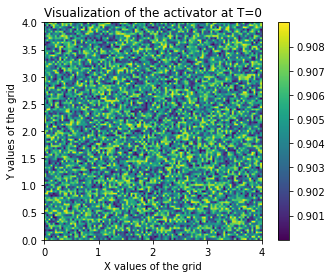

In [10]:
#5.(c)
plt.ion()
plt.figure(1)
plt.clf()
plt.imshow(np.reshape(u0,(Nx+1,Ny+1)),extent=[LeftX,RightX, LeftY,RightY]) # use the f array here
plt.colorbar()
plt.xlabel('X values of the grid')
plt.ylabel('Y values of the grid')
plt.title('Visualization of the activator at T=0')

Text(0.5, 1.0, 'Visualization of the activator at T=20')

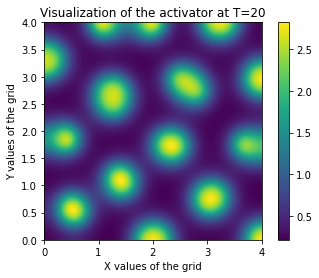

In [11]:
plt.ion()
plt.figure(1)
plt.clf()
plt.imshow(np.reshape(wEnd[:len(wEnd)//2],(Nx+1,Ny+1)),extent=[LeftX,RightX, LeftY,RightY]) # use the f array here
plt.colorbar()
plt.xlabel('X values of the grid')
plt.ylabel('Y values of the grid')
plt.title('Visualization of the activator at T=20')

Text(0.5, 1.0, 'Visualization of the inhibitor at T=0')

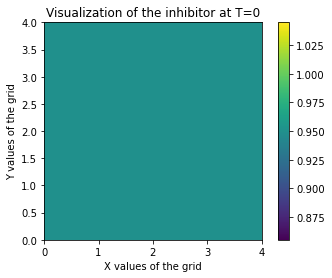

In [12]:
plt.ion()
plt.figure(1)
plt.clf()
plt.imshow(np.reshape(v0,(Nx+1,Ny+1)),extent=[LeftX,RightX, LeftY,RightY]) # use the f array here
plt.colorbar()
plt.xlabel('X values of the grid')
plt.ylabel('Y values of the grid')
plt.title('Visualization of the inhibitor at T=0')

Text(0.5, 1.0, 'Visualization of the inhibitor at T=20')

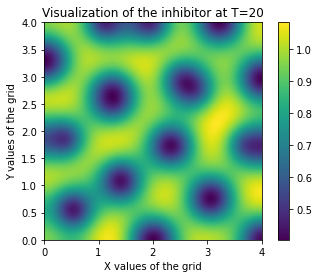

In [13]:
plt.ion()
plt.figure(1)
plt.clf()
plt.imshow(np.reshape(wEnd[len(wEnd)//2:],(Nx+1,Ny+1)),extent=[LeftX,RightX, LeftY,RightY]) # use the f array here
plt.colorbar()
plt.xlabel('X values of the grid')
plt.ylabel('Y values of the grid')
plt.title('Visualization of the inhibitor at T=20')